Step 1: Data Preprocessing

In [170]:
import pandas as pd
file_path = './data/students.csv'

data = pd.read_csv(file_path)


In [171]:
# Display the first few rows of the dataset and its summary
data.head(), data.describe(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143326 entries, 0 to 143325
Data columns (total 50 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   student.id                    143326 non-null  int64  
 1   generation                    143326 non-null  object 
 2   educational.model             143326 non-null  int64  
 3   level                         143326 non-null  object 
 4   gender                        143326 non-null  object 
 5   age                           143326 non-null  int64  
 6   max.degree.parents            143326 non-null  object 
 7   father.education.complete     143326 non-null  object 
 8   father.education.summary      143326 non-null  object 
 9   mother.education.complete     143326 non-null  object 
 10  mother.education.summary      143326 non-null  object 
 11  parents.exatec                143326 non-null  object 
 12  father.exatec                 143326 non-nul

(   student.id generation  educational.model          level gender  age  \
 0           1       AD15                  0    High School   Male   15   
 1           2       AD14                  0  Undergraduate   Male   19   
 2           3       AD18                  0  Undergraduate   Male   23   
 3           4       AD14                  0  Undergraduate   Male   19   
 4           5       AD14                  0  Undergraduate   Male   17   
 
      max.degree.parents      father.education.complete  \
 0        No information                 No information   
 1        No information                 No information   
 2  Undergraduate degree  Received undergraduate degree   
 3        No information                 No information   
 4        No information                 No information   
 
   father.education.summary                  mother.education.complete  ...  \
 0           No information                             No information  ...   
 1           No information       

Handleing the missing values

In [172]:
# Replace placeholders with NaN
data.replace(["No information", "Does not apply", "Unknown"], pd.NA, inplace=True)

# Check for missing values in each column
missing_data = data.isna().sum()

missing_data


student.id                           0
generation                           0
educational.model                    0
level                                0
gender                               0
age                                  0
max.degree.parents               46100
father.education.complete        49351
father.education.summary         49351
mother.education.complete        50458
mother.education.summary         50458
parents.exatec                   24904
father.exatec                    26612
mother.exatec                    25988
tec.no.tec                           0
foreign                              0
zone.type                       101920
first.generation                103181
school                               0
program                              0
region                               0
PNA                                  0
admission.test                    2177
online.test                          0
english.evaluation                   0
admission.rubric         

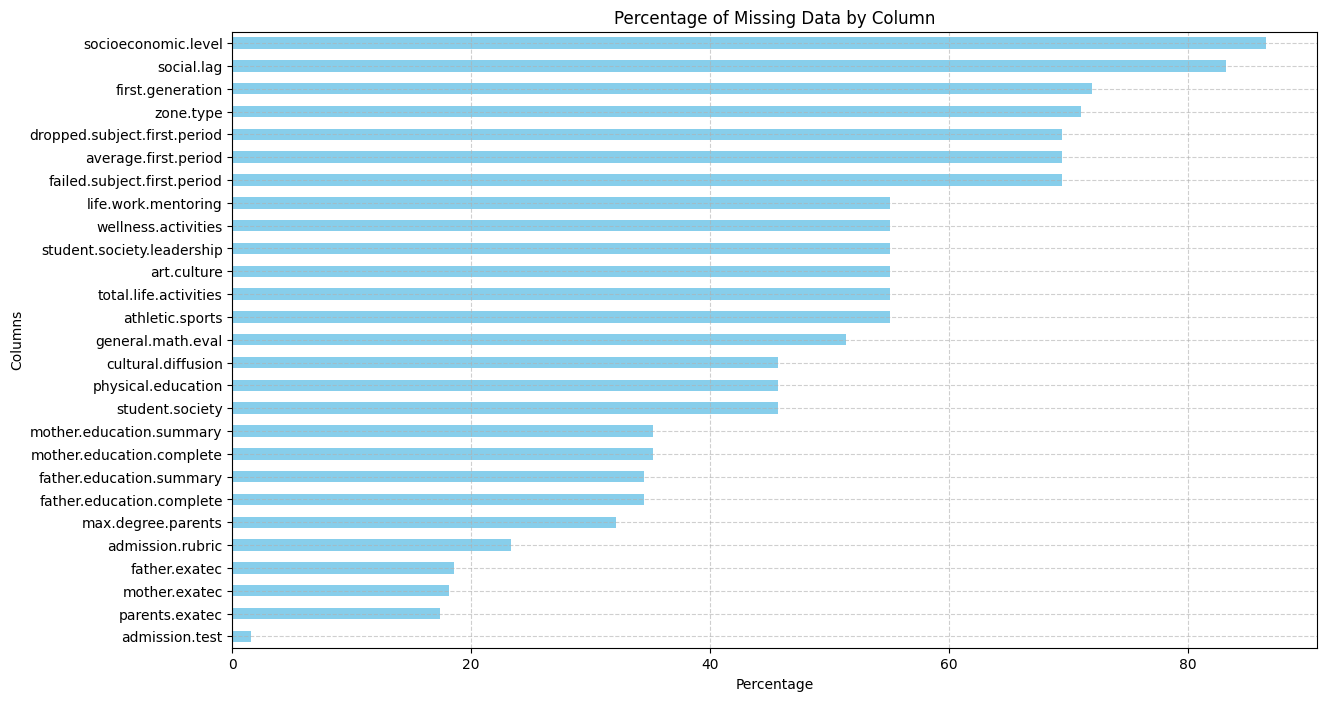

In [173]:
import matplotlib.pyplot as plt

# Calculate percentage of missing data for each column
missing_percentage = (data.isna().sum() / len(data)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]

# Plotting
plt.figure(figsize=(14, 8))
missing_percentage.sort_values().plot(kind='barh', color='skyblue')
plt.title('Percentage of Missing Data by Column')
plt.xlabel('Percentage')
plt.ylabel('Columns')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [174]:
# List of columns to drop based on high percentage of missing data
columns_to_drop = missing_percentage[missing_percentage > 50].index.tolist()

# Drop these columns from the dataset
data_cleaned = data.drop(columns=columns_to_drop)


# Display the updated dataframe information
data_cleaned.info()

#extratcleaned data to a new csv file
data_cleaned.to_csv('./data/students_cleaned.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143326 entries, 0 to 143325
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   student.id                 143326 non-null  int64  
 1   generation                 143326 non-null  object 
 2   educational.model          143326 non-null  int64  
 3   level                      143326 non-null  object 
 4   gender                     143326 non-null  object 
 5   age                        143326 non-null  int64  
 6   max.degree.parents         97226 non-null   object 
 7   father.education.complete  93975 non-null   object 
 8   father.education.summary   93975 non-null   object 
 9   mother.education.complete  92868 non-null   object 
 10  mother.education.summary   92868 non-null   object 
 11  parents.exatec             118422 non-null  object 
 12  father.exatec              116714 non-null  object 
 13  mother.exatec              11

Data Encoding

In [175]:
import pandas as pd

# Load your data
data = pd.read_csv('./data/students_cleaned.csv')

data['foreign'] = data['foreign'].str.replace('Yes: ', '')

# Set the threshold for minimum number of non-NA values
threshold = len(data.columns) * 1  # 100% of the columns

# Drop rows with less non-NA values than the threshold
data_reduced = data.dropna(thresh=threshold)

# Save the reduced data
data_reduced.to_csv('./data/students_reduced.csv', index=False)

# Print the size of the original and reduced datasets
print(f"Original Data Size: {data.shape}")
print(f"Reduced Data Size: {data_reduced.shape}")


Original Data Size: (143326, 36)
Reduced Data Size: (24317, 36)


In [176]:
data_reduced = pd.read_csv('./data/students_reduced.csv')

# Display the first few rows and data types
print(data_reduced.head())
print(data_reduced.dtypes)

   student.id generation  educational.model          level  gender  age  \
0         175       AD14                  0    High School  Female   14   
1         178       AD14                  0    High School    Male   15   
2         180       AD14                  0    High School  Female   15   
3         181       AD14                  0    High School  Female   15   
4         182       AD17                  0  Undergraduate  Female   18   

     max.degree.parents      father.education.complete  \
0  Undergraduate degree  Received undergraduate degree   
1  Undergraduate degree     Graduated from high school   
2  Undergraduate degree  Received undergraduate degree   
3  Undergraduate degree  Received undergraduate degree   
4  Undergraduate degree  Received undergraduate degree   

  father.education.summary      mother.education.complete  ...  \
0     Undergraduate degree  Received undergraduate degree  ...   
1                No degree  Received undergraduate degree  ...   
2 

C:\Users\rogel\AppData\Local\Temp\ipykernel_19128\3256915458.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data_reduced = pd.read_csv('./data/students_reduced.csv')


DATA ENCODING

In [177]:
# Identify categorical columns
categorical_cols = data_reduced.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding
data_encoded = pd.get_dummies(data_reduced, columns=categorical_cols, drop_first=True)


Normalization/Standardization

In [178]:
from sklearn.preprocessing import StandardScaler

# StandardScaler for numerical columns
scaler = StandardScaler()
numerical_cols = data_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Save the processed data
data_encoded.to_csv('./data/encoded_scaled_data.csv', index=False)
